In [2]:
states = {'speed':1000, 'endurance':500, 'power':600, 'will':500, 'smart':500}

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [123]:
# 速度: 假设均速是8m/s, 最高速度为10*速度补正(归一化后全场速度最高的马为2. 最低的马为1)
# 在弯道的情况下，速度必须降到最高速度的40%，减速率为 (当前速度-转弯速度)/(减速时间) 减速时间通常为4s
# 在非弯道的情况下，默认马均会加速逐渐达到并且逼近80%最高速度(线性)
# 最终直线会加速到100%速度

# 力量: 马的加速度同时受力量和速度数值的影响。其加速度初始系数为a(归一化后全场力量最高为6. 最低为3)
s = 0
total_s = 0
v = 0
a = 3
vmax = 15
race_roads = [(300, 'str'), (100, 'cur'), (700, 'str'), (200, 'cur'), (300, 'last_str')] # 1600米赛道

def accelerate(v, a, vmax, is_last=False):
    if not is_last:
        vmax*=0.8
    k = a / vmax
    y = -k * v + a
    return y

def get_dec(v, vmax):
    t = 4
    d = max(0, v - 0.4*vmax)/t
    return d

def slow_down(v, d, vmax):
    if v>0.4*vmax:
        v=max(0.4*vmax, v-d)
    return v


v_ = []
s_ = []
i = 0
for r in race_roads:
    print('进入{}m{}'.format(r[0],r[1]))
    length = r[0]
    s = 0 
    if r[1] == 'cur':
        d = get_dec(v, vmax)
    else:
        d = 0
    while s < length:
        i += 1
        if d>0:
            v = slow_down(v, d, vmax)
        else:
            v += accelerate(v, a, vmax, is_last=True if r[1] == 'last_str' else False)
        v_.append(v)
        s += v
        total_s += v
        s_.append(total_s)
        print('第{}s, 在第{}m，速度为{}m/s'.format(i, s, v))

print('到达终点, 用时{}s'.format(i))

进入300mstr
第1s, 在第3.0m，速度为3.0m/s
第2s, 在第8.25m，速度为5.25m/s
第3s, 在第15.1875m，速度为6.9375m/s
第4s, 在第23.390625m，速度为8.203125m/s
第5s, 在第32.54296875m，速度为9.15234375m/s
第6s, 在第42.4072265625m，速度为9.8642578125m/s
第7s, 在第52.805419921875m，速度为10.398193359375m/s
第8s, 在第63.60406494140625m，速度为10.79864501953125m/s
第9s, 在第74.70304870605469m，速度为11.098983764648438m/s
第10s, 在第86.02728652954102m，速度为11.324237823486328m/s
第11s, 在第97.52046489715576m，速度为11.493178367614746m/s
第12s, 在第109.14034867286682m，速度为11.61988377571106m/s
第13s, 在第120.85526150465012m，速度为11.714912831783295m/s
第14s, 在第132.6414461284876m，速度为11.786184623837471m/s
第15s, 在第144.4810845963657m，速度为11.839638467878103m/s
第16s, 在第156.36081344727427m，速度为11.879728850908577m/s
第17s, 在第168.2706100854557m，速度为11.909796638181433m/s
第18s, 在第180.20295756409178m，速度为11.932347478636075m/s
第19s, 在第192.15221817306883m，速度为11.949260608977056m/s
第20s, 在第204.11416362980162m，速度为11.961945456732792m/s
第21s, 在第216.08562272235122m，速度为11.971459092549594m/s
第22s, 在第228.0642170417634m，

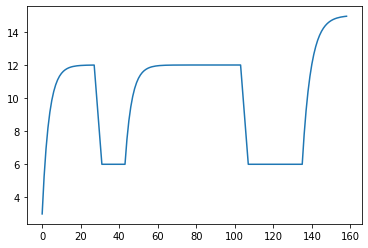

In [122]:
plt.plot(np.arange(len(v_)), v_)
plt.show()

In [ ]:
# 体力: 100*耐力补正(归一化后全场耐力最高的马为2，最低的马为1)
# 在匀速状态下，体力消耗为每秒:速度*10